In [1]:
import numpy as np
import pandas as pd
import torch
import random

random.seed(777)
torch.manual_seed(777)
torch.cuda.manual_seed_all(777)
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [2]:
train = pd.read_csv('x_train.csv',encoding='CP949')
test = pd.read_csv('x_test.csv',encoding='CP949')
train_label = pd.read_csv('y_train.csv',encoding='CP949')
submit = pd.read_csv('sample_submission.csv',encoding='CP949')

In [3]:
train

,시도명,읍면동명,거주인구,근무인구,방문인구,총 유동인구,평균 속도,평균 소요 시간,평균 기온,일강수량,평균 풍속,월,일,년
0,0,26,76018.965,5009.811,36887.341,117916.117,40.467,21.667,17.750,0.000,2.725,9,25,2019
1,1,24,1232416.968,76043.955,451558.268,1760019.191,38.126,31.632,13.300,14.500,4.500,3,4,2018
2,1,23,134260.946,8412.761,78177.981,220851.688,51.107,45.643,5.250,0.500,4.950,4,7,2018
3,1,25,289327.429,39102.424,287029.303,615459.156,33.067,48.000,26.300,0.500,1.500,8,14,2019
4,1,7,1116617.660,96560.651,524905.301,1738083.612,40.392,26.961,8.400,44.000,4.300,12,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21481,0,6,91977.598,14802.819,79885.446,186665.863,41.676,21.676,6.400,0.000,1.600,3,5,2020
21482,0,9,63673.610,3725.663,65813.385,133212.658,48.737,26.105,18.300,7.000,3.700,5,26,2018
21483,1,3,406035.642,46335.550,258079.137,710450.329,49.314,50.943,-6.133,0.833,6.067,1,25,2018
21484,1,25,315737.894,25379.224,283079.548,624196.666,35.312,43.688,8.600,0.000,3.100,3,17,2019


In [4]:
train_x = train.drop([], axis = 1) #해당 레이블은 각각 index. label 이므로 제거
test_x = test.drop([], axis = 1)
train_y = train_label

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, test_size=0.2, random_state= 42)

In [6]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
train_x_sc = sc.fit_transform(X_train)
val_x_sc= sc.transform(X_val)
test_x_sc= sc.transform(test_x)

In [7]:
train_x_tensor = torch.FloatTensor(np.array(train_x_sc)).to(device)
test_x_tensor = torch.FloatTensor(np.array(test_x_sc)).to(device)
val_x_tensor = torch.FloatTensor(np.array(val_x_sc)).to(device)

#train_x_tensor = torch.FloatTensor(X_train.values).to(device)
#val_X_tensor = torch.FloatTensor(X_val.values).to(device)
#test_x_tensor = torch.FloatTensor(test_x.values).to(device)

train_y_tensor = torch.FloatTensor(y_train.values).to(device)
val_y_tensor = torch.FloatTensor(y_val.values).to(device)

In [8]:
class NN(torch.nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.linear1 = torch.nn.Linear(14, 56, bias = True)
        self.linear2 = torch.nn.Linear(56, 56, bias = True)
        self.linear3 = torch.nn.Linear(56, 56, bias = True)
        self.linear4 = torch.nn.Linear(56, 56, bias = True)
        self.linear5 = torch.nn.Linear(56, 56, bias = True)
        self.linear6 = torch.nn.Linear(56, 56, bias = True)
        self.linear7 = torch.nn.Linear(56, 56, bias = True)
        self.linear8 = torch.nn.Linear(56, 56, bias = True)
        self.linear9 = torch.nn.Linear(56, 56, bias = True)
        self.linear10 = torch.nn.Linear(56, 1, bias = True)
        self.relu = torch.nn.ReLU()
        self.sigmoid = torch.nn.Sigmoid()
        self.dropout = torch.nn.Dropout(p=0.3)
    
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        out = self.relu(out)
        out = self.linear3(out)
        out = self.relu(out)
        out = self.linear4(out)
        out = self.relu(out)
        out = self.linear5(out)
        out = self.relu(out)
        out = self.linear6(out)
        out = self.relu(out)
        out = self.linear7(out)
        out = self.relu(out)
        out = self.linear8(out)
        out = self.relu(out)
        out = self.linear9(out)
        out = self.relu(out)
        out = self.linear10(out)
        return out
    
model = NN().to(device)

In [9]:
loss = torch.nn.MSELoss().to(device) #회귀 이므로 mseloss 사용
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

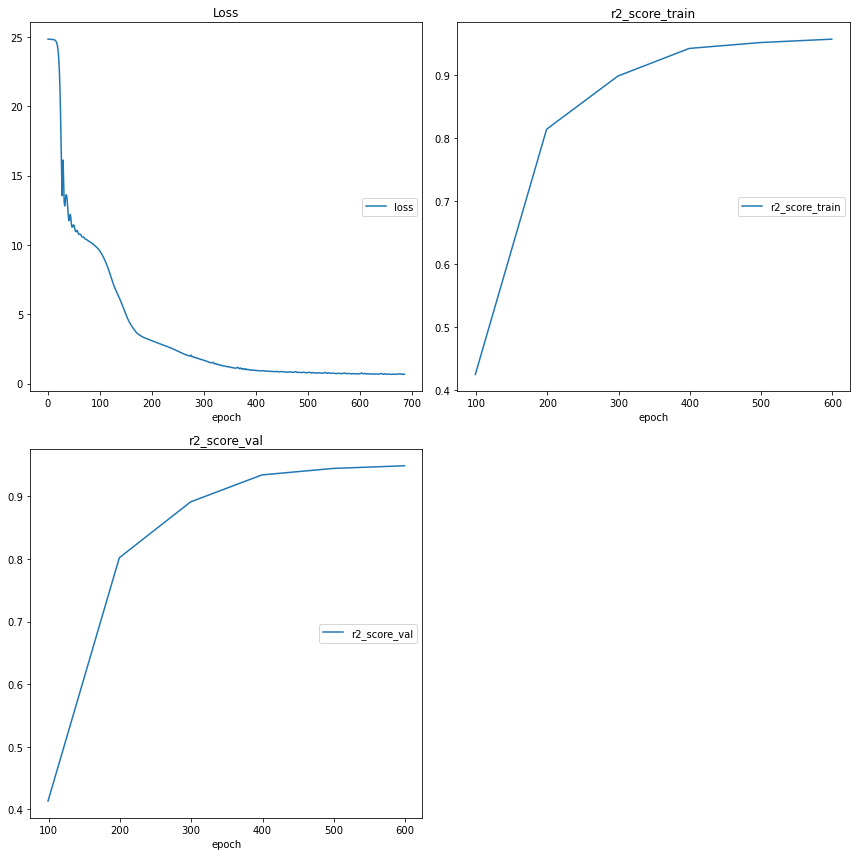

KeyboardInterrupt: 

In [10]:
from livelossplot import PlotLosses
from sklearn.metrics import r2_score

pl = PlotLosses()

model.train()
train_epoch = 1000 #500일 때 best score 발생

for epoch in range(1,train_epoch + 1):
    logs = {}
    
    optimizer.zero_grad()
    
    hypothesis = model(train_x_tensor)
    #print(train_y_tensor.shape)
    cost = loss(hypothesis, train_y_tensor)
    cost.backward()
    logs['loss'] = cost/len(train_x_tensor)
    optimizer.step()
    if epoch % 100 == 0:
        model.eval()
        with torch.no_grad():
            val_prediction = model(val_x_tensor)
            train_prediction = model(train_x_tensor)
            accuracy = r2_score(y_train.교통량, train_prediction.detach().cpu())
            accuracy2 = r2_score(y_val.교통량, val_prediction.detach().cpu())
            logs['r2_score_train'] = accuracy.item()
            logs['r2_score_val'] = accuracy2.item()
    pl.update(logs)
    pl.draw()

In [ ]:
model.eval()
with torch.no_grad():
    prediction = model(test_x_tensor)
    train_prediction = model(val_X_tensor)
    accuracy = r2_score(y_val.교통량, train_prediction.detach().cpu())
    print('R2:', accuracy.item())

In [ ]:
submit['predict'] = prediction.detach().cpu().numpy()

In [ ]:
submit.to_csv('submission_test.csv', index= False)

epoch를 100 ~1000 까지 테스트하였을 때 500에서 가장 좋은 성능이 나왔습니다.